In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d pkdarabi/bone-break-classification-image-dataset

 32% 9.00M/28.4M [00:00<00:00, 26.0MB/s]
100% 28.4M/28.4M [00:00<00:00, 66.7MB/s]


In [3]:
import zipfile
zip_ref= zipfile.ZipFile('/content/bone-break-classification-image-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, models
from tensorflow.keras.layers import Conv2D, BatchNormalization, LeakyReLU, Dropout, Flatten, Dense
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [5]:
# Generators

train_ds= keras.utils.image_dataset_from_directory(
    directory= '/content/Bone Break Classification/Bone Break Classification',
    labels= 'inferred',
    label_mode= 'int',
    batch_size= 32,
    image_size= (256,256)
)

validation_ds= keras.utils.image_dataset_from_directory(
    directory= '/content/Bone Break Classification/Bone Break Classification',
    labels= 'inferred',
    validation_split=0.1,
    subset="validation",
    label_mode= 'int',
    batch_size= 32,
    image_size= (256,256),
    seed=42
)

Found 1129 files belonging to 10 classes.
Found 1129 files belonging to 10 classes.
Using 112 files for validation.


In [6]:
# Normalization

def process(image, label):
  image= tf.cast(image/255., tf.float32)
  return image, label

train_ds= train_ds.map(process)
validation_ds= validation_ds.map(process)

In [7]:
import os

# Assuming your dataset directory structure is organized such that each subdirectory represents a class
class_names = sorted(os.listdir(r"/content/Bone Break Classification/Bone Break Classification"))
class_indices = {class_name: i for i, class_name in enumerate(class_names)}

# Now you can access class indices using class_names or predicted_classes
print(class_indices)

{'Avulsion fracture': 0, 'Comminuted fracture': 1, 'Fracture Dislocation': 2, 'Greenstick fracture': 3, 'Hairline Fracture': 4, 'Impacted fracture': 5, 'Longitudinal fracture': 6, 'Oblique fracture': 7, 'Pathological fracture': 8, 'Spiral Fracture': 9}


In [8]:
# Creating our CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [11]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=validation_ds,
    verbose = 1
)

Epoch 1/10
36/36 [==============================] - 15s 162ms/step - loss: 10.2869 - accuracy: 0.1293 - val_loss: 5.5538 - val_accuracy: 0.1429
Epoch 2/10
36/36 [==============================] - 4s 97ms/step - loss: 5.2071 - accuracy: 0.1479 - val_loss: 6.3406 - val_accuracy: 0.1250
Epoch 3/10
36/36 [==============================] - 4s 97ms/step - loss: 3.5030 - accuracy: 0.1692 - val_loss: 7.4482 - val_accuracy: 0.1071
Epoch 4/10
36/36 [==============================] - 4s 96ms/step - loss: 2.7440 - accuracy: 0.1789 - val_loss: 17.6054 - val_accuracy: 0.1071
Epoch 5/10
36/36 [==============================] - 4s 106ms/step - loss: 2.6633 - accuracy: 0.1736 - val_loss: 12.7909 - val_accuracy: 0.1250
Epoch 6/10
36/36 [==============================] - 4s 96ms/step - loss: 2.4772 - accuracy: 0.1807 - val_loss: 3.4490 - val_accuracy: 0.1071
Epoch 7/10
36/36 [==============================] - 4s 107ms/step - loss: 2.4276 - accuracy: 0.2143 - val_loss: 6.4559 - val_accuracy: 0.0893
Epoch 

## Chnage the model

In [19]:
# Creating our CNN model

model = models.Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization(momentum=0.9))
model.add(LeakyReLU(0.2))
model.add(Dropout(rate=0.2))
model.add(Conv2D(64, kernel_size=(3,3), strides=2, padding='same'))
model.add(BatchNormalization(momentum=0.9))
model.add(LeakyReLU(0.2))
model.add(Dropout(rate=0.2))
model.add(Conv2D(128, kernel_size=(3,3), strides=2, padding='same'))
model.add(BatchNormalization(momentum=0.9))
model.add(LeakyReLU(0.2))
model.add(Dropout(rate=0.2))
model.add(Conv2D(256, kernel_size=(3,3), strides=2, padding='same'))
model.add(BatchNormalization(momentum=0.9))
model.add(LeakyReLU(0.2))
model.add(Dropout(rate=0.2))

model.add(Flatten())

model.add(Dense(100))
model.add(BatchNormalization(momentum=0.9))
model.add(LeakyReLU(0.2))
model.add(Dropout(rate=0.2))

model.add(Dense(10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 256, 256, 32)      128       
 chNormalization)                                                
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256, 256, 32)      0         
                                                                 
 dropout_2 (Dropout)         (None, 256, 256, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 128, 128, 64)      256       
 chNormalization)                                     

In [21]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [22]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=validation_ds,
    verbose = 1
)

Epoch 1/10
36/36 [==============================] - 21s 321ms/step - loss: 2.6710 - accuracy: 0.1373 - val_loss: 2.3577 - val_accuracy: 0.1518
Epoch 2/10
36/36 [==============================] - 9s 229ms/step - loss: 2.1791 - accuracy: 0.2657 - val_loss: 2.4880 - val_accuracy: 0.2143
Epoch 3/10
36/36 [==============================] - 8s 220ms/step - loss: 1.8992 - accuracy: 0.3534 - val_loss: 1.9439 - val_accuracy: 0.3661
Epoch 4/10
36/36 [==============================] - 8s 223ms/step - loss: 1.5502 - accuracy: 0.4951 - val_loss: 1.0557 - val_accuracy: 0.6964
Epoch 5/10
36/36 [==============================] - 8s 223ms/step - loss: 0.9803 - accuracy: 0.7095 - val_loss: 0.5938 - val_accuracy: 0.7946
Epoch 6/10
36/36 [==============================] - 9s 232ms/step - loss: 0.5197 - accuracy: 0.8733 - val_loss: 0.2665 - val_accuracy: 0.9643
Epoch 7/10
36/36 [==============================] - 9s 234ms/step - loss: 0.2613 - accuracy: 0.9610 - val_loss: 0.0937 - val_accuracy: 0.9911
Epoch

### Accuracy is 99.11%

In [25]:
!pip install pillow
!pip install opencv-python
import cv2
import numpy as np
import matplotlib.pyplot as plt

Path of the image to be predicted: /content/Bone Break Classification/Bone Break Classification/Spiral Fracture/Test/590_2014_1411_Fig1_HTc234c5605fa8336a4d522e89d48.jpg


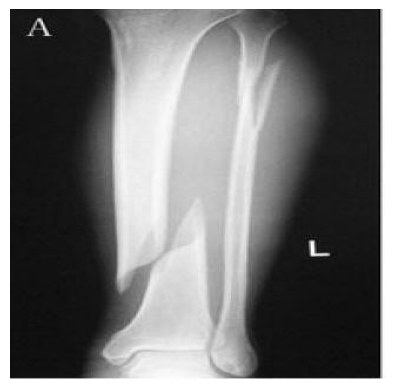

1/1 [==============================] - 0s 17ms/step
[[2.5410501e-03 4.9175643e-03 4.4953283e-03 1.9190523e-03 1.0054199e-03
  8.8332151e-04 8.2875229e-04 3.8717095e-02 5.6154450e-04 9.4413090e-01]]
9


In [30]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis
plt.show()

input_image_resized = cv2.resize(input_image, (256,256))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,256,256,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


## Model performs perfectly.  
### 99% accuracy is satisfied.

In [31]:
model_loss, model_acc = model.evaluate(train_ds)
print("Model has a loss of %.2f and accuracy %.2f%%" % (model_loss, model_acc*100))

36/36 [==============================] - 2s 51ms/step - loss: 0.0295 - accuracy: 0.9947
Model has a loss of 0.03 and accuracy 99.47%


In [32]:
model_loss, model_acc = model.evaluate(validation_ds)
print("Model has a loss of %.2f and accuracy %.2f%%" % (model_loss, model_acc*100))

4/4 [==============================] - 0s 50ms/step - loss: 0.0290 - accuracy: 0.9911
Model has a loss of 0.03 and accuracy 99.11%


In [33]:
model.save('Bone_Break_Classification.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
